# **MNA - IAyAA**
## **Sesión-Active Class Complementaria**
## **Semanas 5 y 6**




https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
# Si queremos asegurar que en la partición los niveles de las categóricas queden estratificados lo mejor posible:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [3]:
titanicdata = sns.load_dataset('titanic')
df = pd.DataFrame(titanicdata)   # por facilidad consideremos los datps como un DataFrame de Pandas.
print(df.shape)
df.head().T

(891, 15)


,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Variables con la misma información: "survived" y "alive"; "pclass" y "class"; "embarked" y "embark_town".



In [5]:
df.drop(['alive','class','embark_town',
         'deck'
         ], axis=1, inplace=True)
print(df.shape)
df.head().T

(891, 11)


,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
who,man,woman,woman,woman,man
adult_male,True,False,False,False,True


## **PREGUNTA:**

## **¿Cómo se afecta el entrenamiento el usar por ejemplo una partición de 60%-20%-20% o una de 80%-10%-10%? ¿Cuándo se recomendaría usar una u otra de estas particiones?**


In [6]:
Xtrain, Xtv, ytrain, ytv = train_test_split(df.iloc[:,1:], df.iloc[:,0],
                                            train_size=0.6,
                                            random_state=0
                                            )
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True,
                                            random_state=0
                                            )

print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)


# Sin cancelar "deck":
#print('\nSolo para ilustrar que en este proceso es donde se pueden generar niveles con 0 valores en alguna variable categórica:')
#print(Xtrain['deck'].value_counts())
#print(Xval['deck'].value_counts())
#print(Xtest['deck'].value_counts())

(534, 10) (534,)
(178, 10) (178,)
(179, 10) (179,)


In [7]:
# Separemos variables numéricas y categóricas.
# Supongamos que las separamos como se indica a continuación.

cat_ord_lista = ['pclass']    # lista de las variables ordinales

cat_nom_lista = ['sex','adult_male','embarked','who','alone']   # lista de variables nominales(& binarias)

num_lista = ['age','sibsp','parch','fare']    # lista de las variables numéricas.

## **Análisis Variables Categóricas**

In [8]:
print(Xtrain['pclass'].value_counts())
print(Xtrain['pclass'].value_counts() / Xtrain.shape[0])

3    291
1    132
2    111
Name: pclass, dtype: int64
3    0.544944
1    0.247191
2    0.207865
Name: pclass, dtype: float64


In [9]:
print(Xtrain['sex'].value_counts())
print(Xtrain['sex'].value_counts() / Xtrain.shape[0])

male      345
female    189
Name: sex, dtype: int64
male      0.646067
female    0.353933
Name: sex, dtype: float64


In [10]:
print(Xtrain['adult_male'].value_counts())
print(Xtrain['adult_male'].value_counts() / Xtrain.shape[0])

True     321
False    213
Name: adult_male, dtype: int64
True     0.601124
False    0.398876
Name: adult_male, dtype: float64


In [11]:
print(Xtrain['embarked'].value_counts())
print(Xtrain['embarked'].value_counts() / Xtrain.shape[0])

S    389
C     94
Q     49
Name: embarked, dtype: int64
S    0.728464
C    0.176030
Q    0.091760
Name: embarked, dtype: float64


In [12]:
print(Xtrain['who'].value_counts())
print(Xtrain['who'].value_counts() / Xtrain.shape[0])

man      321
woman    163
child     50
Name: who, dtype: int64
man      0.601124
woman    0.305243
child    0.093633
Name: who, dtype: float64


In [13]:
print(Xtrain['alone'].value_counts())
print(Xtrain['alone'].value_counts() / Xtrain.shape[0])

True     321
False    213
Name: alone, dtype: int64
True     0.601124
False    0.398876
Name: alone, dtype: float64


In [14]:
# Y la variable de salida:

tmp = pd.DataFrame(yval)

print(tmp.value_counts())
print(tmp.value_counts() / tmp.shape[0])

survived
0           104
1            74
dtype: int64
survived
0           0.58427
1           0.41573
dtype: float64


## **PREGUNTA:**

## **¿Qué transformaciones consideras serían adecuadas aplicar a las categóricas, de ser el caso?**

## **Análisis Variables Numéricas**

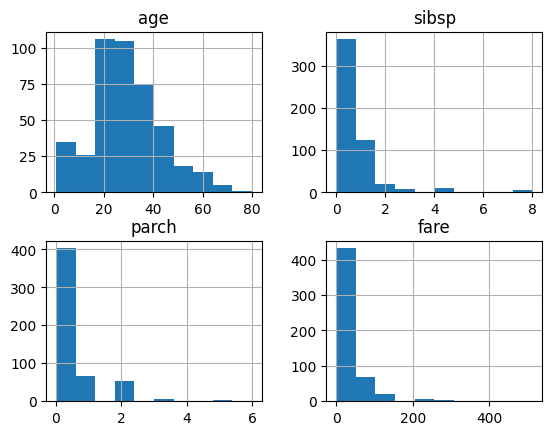

In [15]:
Xtrain[num_lista].hist();

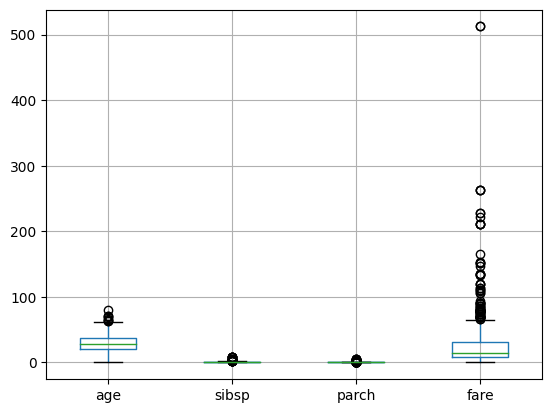

In [16]:
Xtrain[num_lista].boxplot();

## **PREGUNTA:**

## **¿Qué transformaciones consideras serían adecuadas aplicar a las numéricas, de ser el caso?**

In [17]:
num_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                             ('minmax', MinMaxScaler())])
num_pipe_nombres = num_lista

catord_pipe = Pipeline(steps = [('impOrd', SimpleImputer(strategy='most_frequent')),
                             ('ordtrasnf', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))])
catord_pipe_nombres = cat_ord_lista

catnom_pipe = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
catnom_pipe_nombres = cat_nom_lista


columnasTransformer = ColumnTransformer(transformers = [('num_transf', num_pipe, num_pipe_nombres),
                                                        ('catord_transf', catord_pipe, catord_pipe_nombres),
                                                        ('catnom_transf', catnom_pipe, catnom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


## **¿Qué otras transformaciones consideras se pudieran agregar?**

In [18]:
# Conjuntamos conjunto de Entrenamiento y Validación para usar Cross-Validation:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

print(Xtrainval.shape, ytrainval.shape)

(712, 10) (712,)


## **¿Por qué concatenamos estos conjuntos?**

In [19]:
# Podemos verifcar la cantidad de columnas que se estarán gnerando después de aplicar las transformaciones:

Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)

print("Antes de las transformaciones:", Xtmp.shape)
print("Después de las transformaciones:", tmp.shape)

Antes de las transformaciones: (712, 10)
Después de las transformaciones: (712, 12)


In [20]:
# Modelos de Regresión:
#from sklearn.linear_model import LinearRegression
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.svm import SVR

# Modelos de Claisficación:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

XGBoost-Clasificación:

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

XGBost-Regresión:

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor


Puedes consultar la lista de métricas en la siguiente liga:

https://scikit-learn.org/stable/modules/model_evaluation.html

## **PREGUNTA:**

## **Ejecuta primeramente el modelo con sus hiperparámetros predeterminados y luego trata de ir razonando cómo y cuáles modificar.**

## **En general se hace uso de métodos como GridSearchCV() o bien RandomizedSearchCV() de Scikit-learn para la búsqueda de los mejores hiperparámetros, pero por el momento hagámoslo de manera "manual" para tener una mejor comprensión del ejecto de cada uno.**

## **Pogamos por el momento que el objetivo de este ejercicio sea que cada modelo no quede ni sub-entrenado, ni sobre-entrenado con respecto a la métrica de la Exactitud (Accuracy), sin importar las demás métricas. Es decir, a partir de los hiperparámetros predetermiandos de cada modelo, trata de lograr dicho objetivo.**

## **Y antes de iniciar, ¿podríamos establecer un primer valor de entrada de la Exactitud (Accuracy) a partir del cual pudiéramos decir que el modelo está sub-entrenado? Indica qué valor tomarás como referencia en este problema para determinar que un modelo está sub-entrenado: ... [incluye tu respuesta] ...**

## **Y para el caso sobre-entrenado, ¿cuándo podríamos decir que el modelo está sobre-emntrenado? Indica qué criterio tomarás como referencia en este problema para determinar que un modelo está sobre-entrenado: ... [incluye tu respuesta] ...**

In [21]:
# Veamos algunas variantes de los hiperparámetros de cada modelo
# para que te familiarices con la manera en que afecta cada uno
# de ellos en su desempeño:

def modelos():
  modelos, nombres = list(), list()



  # Regresión Logística:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=100,    # 10, 100, 1000
                                    C = 1.0,     # 0.000001, 0.005, 0.01,  1000
                                    #random_state=1
                                    ))
  nombres.append('LR')



  # k-Vecinos Más Cercanos:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier(n_neighbors = 5,     # 1, 5, 21, 201
                                      ))
  nombres.append('kNN')



  # Árbol de Decisión:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier(max_depth = None,       # None, 5, 3, 1
                                        min_samples_split=2,   # 2,3,5, 20
                                        #min_samples_leaf=1,  # trata al inicio de usar solo uno de estos, split o leaf, para su mejor comprensión.
                                        #random_state=7
                                        ))
  nombres.append('DTree')



  # Bosque Aleatorio:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
                                        max_depth= None,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                        min_samples_split=2,    # 2, 5, 15
                                        #random_state=0
                                        ))
  nombres.append('RF')




  # XGBoost:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=100,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 6,             # 1,3, 6,
                               learning_rate=0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=1.0,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               #random_state=5,
                               objective='binary:logistic',
                               n_jobs=-1))
  nombres.append('XGBoost')




  # Red Neuronal Artificial: Perceptrón MultiCapa:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=1000,                  # 200,
                               alpha=0.0001,               # término de regularización L2.
                               #learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                               #learning_rate_init=0.001,
                               #random_state=1
                               ))
  nombres.append('MLP')



  # Máquina de Vector Soporte : Support Vector Machine
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel='rbf',
                     C= 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state=7
                     ))
  nombres.append('SVM')





  return modelos, nombres



# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

modelo, nombres = modelos()
resultados = list()

for i in range(len(modelo)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}   # métricas clasificación
  #mismetricas = {'neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error','r2'}  # métricas regresión

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))



>> LR
	 test_f1 0.772 (0.039)
	 train_f1 0.780 (0.009)
	 test_precision 0.805 (0.052)
	 train_precision 0.812 (0.016)
	 test_roc_auc 0.861 (0.034)
	 train_roc_auc 0.869 (0.009)
	 test_recall 0.743 (0.046)
	 train_recall 0.751 (0.012)
	 test_accuracy 0.827 (0.030)
	 train_accuracy 0.834 (0.007)
>> kNN
	 test_f1 0.728 (0.028)
	 train_f1 0.809 (0.013)
	 test_precision 0.782 (0.046)
	 train_precision 0.845 (0.017)
	 test_roc_auc 0.836 (0.028)
	 train_roc_auc 0.929 (0.006)
	 test_recall 0.685 (0.051)
	 train_recall 0.777 (0.025)
	 test_accuracy 0.799 (0.020)
	 train_accuracy 0.856 (0.009)
>> DTree
	 test_f1 0.697 (0.045)
	 train_f1 0.981 (0.003)
	 test_precision 0.706 (0.043)
	 train_precision 0.998 (0.002)
	 test_roc_auc 0.752 (0.036)
	 train_roc_auc 0.999 (0.000)
	 test_recall 0.693 (0.071)
	 train_recall 0.964 (0.006)
	 test_accuracy 0.764 (0.031)
	 train_accuracy 0.985 (0.002)
>> RF
	 test_f1 0.739 (0.051)
	 train_f1 0.981 (0.005)
	 test_precision 0.757 (0.041)
	 train_precision 0.992 (

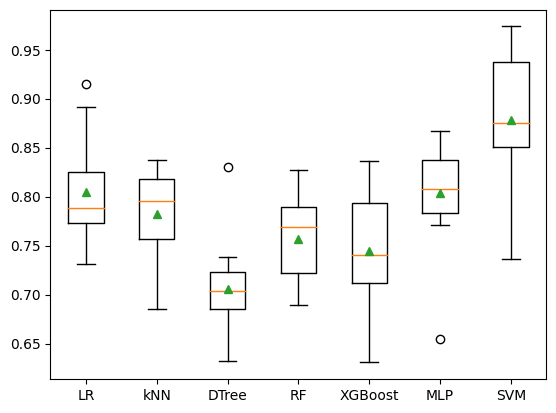

In [22]:
tmp = [resultados[j]['test_precision'] for j in range(len(resultados)) ]

plt.boxplot(tmp, labels=nombres, showmeans=True)
plt.show()

## **Mejor Modelo:**

Supongamos que fue la SVM con la métrica de Precision:

In [23]:
mf = SVC(kernel='rbf',C= 1.0,gamma= 'scale')

mf_pipe = Pipeline(steps=[('ct',columnasTransformer),('m',mf)])

mf_pipe.fit(Xtrainval,ytrainval)

# PROFESOR:
# Verificar que utilicen el conjunto de Prueba Test:
yhat = mf_pipe.predict(Xtest)

print(classification_report(ytest, yhat))

print('Métrica-ROC-Test:', np.round(roc_auc_score(ytest, yhat), 2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       117
           1       0.80      0.56      0.66        62

    accuracy                           0.80       179
   macro avg       0.80      0.74      0.76       179
weighted avg       0.80      0.80      0.79       179

Métrica-ROC-Test: 0.74


In [24]:
# O bien, usando la matriz de confusión y calculando directamente cada métrica:

cm = confusion_matrix(ytest, yhat)
cm

array([[108,   9],
       [ 27,  35]])

In [25]:
VN = cm[0,0]
VP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

mi_precision = VP / (VP + FP)
mi_precision

0.7954545454545454